In [2]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00


# Preprocessing data

In [6]:
from pyvi.ViTokenizer import tokenize
import re, os, string
import pandas as pd

def clean_text(text):
    text = re.sub('<.*?>', '', text).strip()
    text = re.sub('(\s)+', r'\1', text)
    return text

def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
    return text.lower()

# list stopwords
filename = '/content/drive/MyDrive/NLP/stopwords.csv'
data = pd.read_csv(filename, sep="\t", encoding='utf-8')
list_stopwords = data['stopwords']

def remove_stopword(text):
    pre_text = []
    words = text.split()
    for word in words:
        if word not in list_stopwords:
            pre_text.append(word)
    text2 = ' '.join(pre_text)

    return text2

def sentence_segment(text):
    sents = re.split("([.?!])?[\n]+|[.?!] ", text)
    return sents

def word_segment(sent):
    sent = tokenize(sent)
    return sent

path_to_corpus = '/content/drive/MyDrive/NLP/combined.txt'

with open('./datatrain.txt', 'w') as f_w:
    # Đọc nội dung từ file combined.txt
    with open(path_to_corpus, 'r') as f_r:
        contents = f_r.read().strip().split('</doc>')
        for content in contents:
            if len(content) < 5:
                continue
            content = clean_text(content)
            sents = sentence_segment(content)
            for sent in sents:
                if sent:
                    sent = word_segment(sent)
                    sent = remove_stopword(normalize_text(sent))
                    if len(sent.split()) > 1:
                        f_w.write(sent + '\n')
            print("Done")

print("Processing complete.")

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


# FastText

In [9]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import string
from pyvi import ViTokenizer
from gensim.models import FastText

# path data
pathdata = './datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(path, 'r', encoding='utf-8').readlines()
    for sent in sents:
        traindata.append(sent.strip().split())
    return traindata

if __name__ == '__main__':
    train_data = read_data(pathdata)

    model_fasttext = FastText(vector_size=150, window=10, min_count=2, workers=4, sg=1)
    model_fasttext.build_vocab(corpus_iterable=train_data)
    model_fasttext.train(corpus_iterable=train_data, total_examples=model_fasttext.corpus_count, epochs=model_fasttext.epochs)

    model_fasttext.wv.save("fasttext_gensim.model")

# Visualize

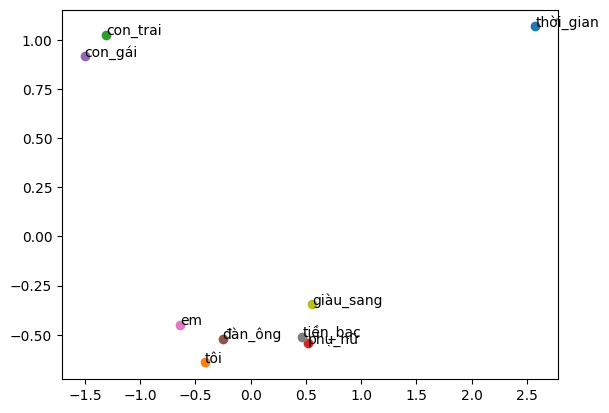

In [12]:
import gensim.models.keyedvectors as word2vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the model
model = word2vec.KeyedVectors.load('/content/fasttext_gensim.model')

# Path to the words file
pathfile = '/content/words.txt'

# Read words from the file
with open(pathfile, 'r', encoding='utf-8') as f:
    words = f.readlines()
    words = [word.strip() for word in words]

words_np = []
words_label = []

# Iterate over the words in the model's vocabulary
for word in model.key_to_index.keys():
    if word in words:
        words_np.append(model[word])
        words_label.append(word)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)

# Function to visualize the words
def visualize():
    fig, ax = plt.subplots()

    for index, vec in enumerate(reduced):
        x, y = vec[0], vec[1]

        ax.scatter(x, y)
        ax.annotate(words_label[index], xy=(x, y))

    plt.show()
    return

if __name__ == '__main__':
    visualize()

# Use model to print similar words

In [15]:
# -*- coding: utf-8 -*-

from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import numpy as np

# Load the model
model = KeyedVectors.load('/content/fasttext_gensim.model')

# Find and print most similar words
for word in model.most_similar("bóng đá"):
    print(word[0])

bóng_rổ
bóng_đá
bóng
bóng_chày
bóng_bàn
bóng_chuyền
bóng_ma
bóng_tối
bó
vô_địch


# Word2Vec

In [17]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import string
from pyvi import ViTokenizer
from gensim.models import Word2Vec

# path data
pathdata = './datatrain.txt'

def read_data(path):
    traindata = []
    sents = open(path, 'r', encoding='utf-8').readlines()
    for sent in sents:
        traindata.append(sent.split())
    return traindata

if __name__ == '__main__':
    train_data = read_data(pathdata)

    model = Word2Vec(train_data, vector_size=150, window=10, min_count=2, workers=4, sg=0)
    model.wv.save("word2vec_skipgram.model")

# Visualize

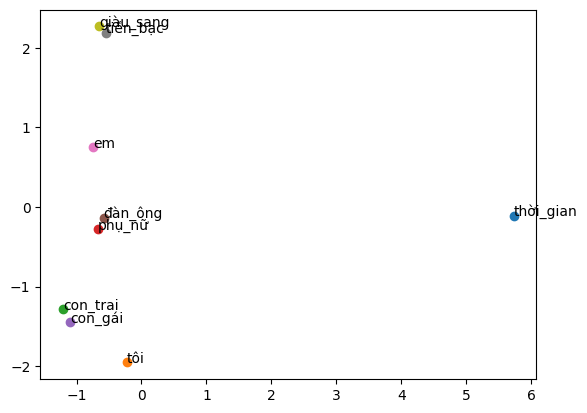

In [19]:
import gensim.models.keyedvectors as word2vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the model
model = word2vec.KeyedVectors.load('/content/word2vec_skipgram.model')

# Path to the words file
pathfile = '/content/words.txt'

# Read words from the file
with open(pathfile, 'r', encoding='utf-8') as f:
    words = f.readlines()
    words = [word.strip() for word in words]

words_np = []
words_label = []

# Iterate over the words in the model's vocabulary
for word in model.key_to_index.keys():
    if word in words:
        words_np.append(model[word])
        words_label.append(word)

# Perform PCA
pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)

# Function to visualize the words
def visualize():
    fig, ax = plt.subplots()

    for index, vec in enumerate(reduced):
        x, y = vec[0], vec[1]

        ax.scatter(x, y)
        ax.annotate(words_label[index], xy=(x, y))

    plt.show()
    return

if __name__ == '__main__':
    visualize()

# Using Word2Vec model to print similar words

In [23]:
# KeyError: "Key 'bóng đá' not present in vocabulary"
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import numpy as np

# Load the model
model = KeyedVectors.load('/content/word2vec_skipgram.model')

# Find and print most similar words
for word in model.most_similar("bóng"):
    print(word[0])

nhảy_cầu
cầu_lông
bóng_bàn
ssn
đua
us
1500
dalat
ga
kaltz
